In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import sklearn

In [3]:
df = pd.read_csv("UNet3Plus Loss.csv")

In [5]:
df.head()

,Epoch,Train Loss,Val Loss
0,1,0.6618,0.6635
1,2,0.6499,0.6384
2,3,0.6459,0.6399
3,4,0.6435,0.6402
4,5,0.6422,0.6349


In [13]:
epoch = df['Epoch'].to_numpy()
epoch

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [11]:
training_loss = df['Train Loss'].to_numpy()
training_loss

array([0.6618, 0.6499, 0.6459, 0.6435, 0.6422, 0.6411, 0.6397, 0.6398,
       0.6386, 0.6396, 0.6373, 0.6375, 0.6368, 0.6369, 0.6354, 0.6355,
       0.635 , 0.6346, 0.6342, 0.6344, 0.6342, 0.6333, 0.633 , 0.6342,
       0.6326, 0.6316, 0.6309, 0.6309, 0.6305, 0.6294, 0.6298, 0.6305,
       0.6289, 0.6294, 0.6283, 0.6284, 0.6275, 0.6272, 0.6274, 0.6271,
       0.6266, 0.6265, 0.6267, 0.6268, 0.626 , 0.6258, 0.6255, 0.6253,
       0.6252, 0.6248])

In [15]:
val_loss = df['Val Loss'].to_numpy()
val_loss

array([0.6635, 0.6384, 0.6399, 0.6402, 0.6349, 0.6307, 0.6363, 0.6338,
       0.6308, 0.6345, 0.6271, 0.634 , 0.6332, 0.6278, 0.6368, 0.6312,
       0.6311, 0.6331, 0.6342, 0.6293, 0.6324, 0.6305, 0.6313, 0.6311,
       0.6298, 0.6286, 0.6291, 0.6293, 0.6324, 0.6313, 0.6323, 0.6307,
       0.6344, 0.6317, 0.6354, 0.6319, 0.6286, 0.6279, 0.6339, 0.6279,
       0.6323, 0.6323, 0.6334, 0.6313, 0.6401, 0.6301, 0.6294, 0.6282,
       0.6286, 0.6293])

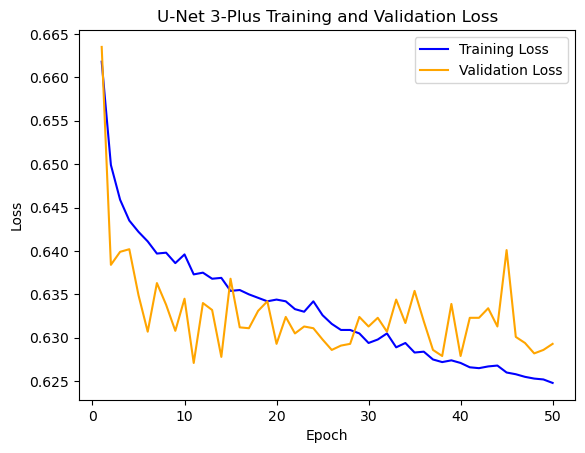

In [21]:
plt.plot(epoch, training_loss, "blue", label="Training Loss")
plt.plot(epoch, val_loss, "orange", label="Validation Loss")
plt.title("U-Net 3-Plus Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [22]:
df2 = pd.read_csv("UNet2Plus Loss.csv")

In [23]:
df2.head()

,Epoch,Training Loss,Val Loss
0,1,0.6946,0.6931
1,2,0.6931,0.6931
2,3,0.6931,0.6931
3,4,0.6931,0.6931
4,5,0.6931,0.6931


In [24]:
epoch = df2['Epoch'].to_numpy()
epoch

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [26]:
training_loss = df2['Training Loss'].to_numpy()
training_loss

array([0.6946, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
       0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
       0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
       0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
       0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
       0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
       0.6931, 0.6931])

In [27]:
val_loss = df2['Val Loss'].to_numpy()
val_loss

array([0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
       0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
       0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
       0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
       0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
       0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
       0.6931, 0.6931])

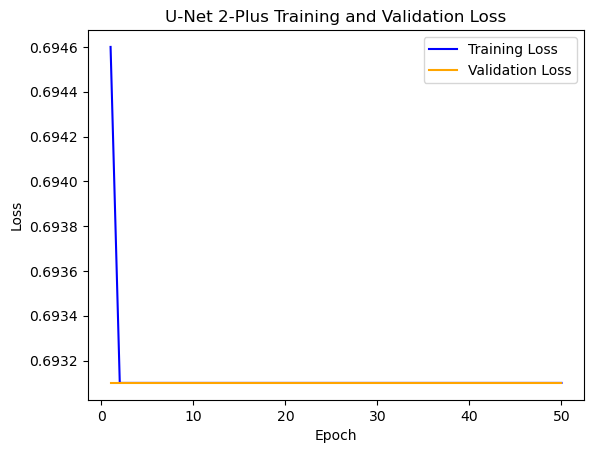

In [29]:
plt.plot(epoch, training_loss, "blue", label="Training Loss")
plt.plot(epoch, val_loss, "orange", label="Validation Loss")
plt.title("U-Net 2-Plus Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()